In [2]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
#%matplotlib notebook
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Glosario
# * Convertir: el objetivo de mostrar publicidad es que un dispositivo instale una aplicación.
# A ese evento se le llama conversión.
# * Dispositivo: entidad con un id de publicidad asociado. Por ejemplo: un celular Samsung
# J6 con Android tiene un id único, un Apple iPhone tiene un identificador único.
# * Evento: cualquier tipo de acción categorizada dentro de una aplicación. Por ejemplo, en
# una aplicación de e-commerce un funnel de eventos muy común puede ser del estilo
# “abrir_app” → “buscar_producto” → “revisar_catalogo” → “agregar_a_carrito” →
# “efectuar_compra”. Cada uno de estos pasos es un evento.
# * Subasta: en el momento que una aplicación quiere mostrar una publicidad, ese espacio
# se vende en una subasta (generalmente de segundo precio) donde todos los
# interesados en mostrar una publicidad ofertan un precio y gana quién más ofrece.

#funnel de eventos: secuencia de eventos

## Auctions


In [19]:
auctions = pd.read_csv('../data2/auctions.csv.gzip',compression='gzip', dtype='object')

In [20]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    object
country            object
date               object
device_id          object
platform           object
ref_type_id        object
source_id          object
dtypes: object(7)
memory usage: 1.0+ GB


In [23]:
# vemos las diferentes tipos de subastas
print("Tipos de subastas nulas: "+ str(auctions['auction_type_id'].isnull().count()))
print("Tipos de subastas NO nulas: "+ str(auctions['auction_type_id'].notnull().count()))

# Vemos que en los actions el tipo de subastas no es un dato!

# Removemos esa columna
auc = auctions[['country','date','device_id','platform','ref_type_id','source_id']]
auc.head()

Tipos de subastas nulas: 19571319
Tipos de subastas NO nulas: 19571319


,country,date,device_id,platform,ref_type_id,source_id
0,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [18]:
auctions.head()

,country,date,device_id,platform,ref_type_id,source_id
0,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [10]:
# Vemos que paises llevan a cabo subastas
auctions.groupby(['country']).count()

,auction_type_id,date,device_id,platform,ref_type_id,source_id
country,,,,,,
6333597102633388268,0,19571319,19571319,19571319,19571319,19571319


## :. Sólo existe un país en donde se realizan las subastas

Para un user existen app de interés? Cuáles son las app de interés para un user?
De qué depende que un device apareza en una subasta? Depende de la cantidad de intereses del user? Depende del tipo de intereses?
El interés de user sobre una publicidad es constante en el tiempo? Varía en tiempo? Con qué frecuencia? De qué depende esa variación?
Se puede relacionar los intereses de un user con la zona en donde el usuario se encuentra?
Depende que device aparezca en una subasta del día de la semana/hora de la semana? Qué sucede los fin de semana/semana/semana laboral?

In [8]:
# Reordenamos el df
#auctions['hour'] = auctions['date'].dt.hour
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [2]:
auc = pd.read_csv('../data2/auctions.csv.gzip',compression='gzip',\
                        usecols=['date','device_id','platform','ref_type_id','source_id'],\
                        dtype={'device_id':'int64','platform':'category','ref_type_id':'category','source_id':'category'},\
                        parse_dates=['date'])

In [4]:
#auctions['hour'] = auctions['date'].dt.hour
#auctions2['day'] = auctions2['date']
#auctions2.groupby(['day'])

#projects_2017['launched_datetime'] = pd.to_datetime(projects_2017['launched'])
#auctions2['day'] = pd.datetime(auctions2['date'])
#auctions2['date'].head()
#pd.datetime(auctions2['date'],format='%Y%m%d')
auc.head()

,date,device_id,platform,ref_type_id,source_id
0,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [3]:
# sacamos las h/m/s
auc['date'] = pd.to_datetime(auc['date']).dt.date
auc.head()

,date,device_id,platform,ref_type_id,source_id
0,2019-03-11,6059599345986491085,1,1,0
1,2019-03-11,1115994996230693426,1,1,0
2,2019-03-11,7463856250762200923,1,1,0
3,2019-03-11,7829815350267792040,1,1,0
4,2019-03-11,1448534231953777480,1,1,0


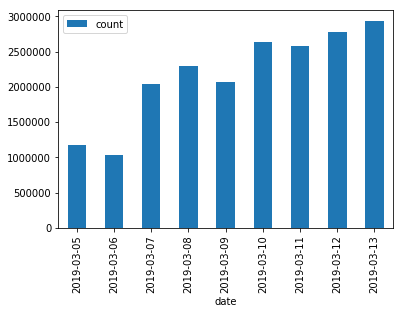

In [4]:
# como se distribuyen la cantidad de subastas según los días
auc['count'] = 1
auc_date_count = auc[['date','count']]
g_date = auc_date_count.groupby(['date'],as_index = True).count()
g_date.plot(kind='bar')

In [120]:
#  M    X    J    V     S    D     L    M      X
# 5/3  6/3  7/3  8/3  9/3  10/3  11/3  12/3  13/3
# Mirando las cantidades de subastas por día vemos que para el mismo día, en semanas diferentes existe
# una variación alta.
# No se puede concluir nada respecto a la cantidad de subastas por día.

In [6]:
auc.head().dtypes

date             object
device_id         int64
platform       category
ref_type_id    category
source_id      category
dtype: object

In [33]:
# Cada cuanto tiempo aparece nuevamente un device en una subasta?
auc_d = auc[['device_id','count']]
auc_d = auc_d.groupby('device_id',as_index=False).count()
auc_d.head(10)

,device_id,count
0,113858820194433,48
1,148049712234927,4
2,163367509015039,36
3,250378692954397,14
4,356084629798952,4
5,400199180093841,21
6,536121741587392,4
7,542666285694718,1143
8,557498597278769,80
9,650684704532018,1


('Prom. de apariciones de device en todos los dias: ', '94.55794122052208')
('Max. de apariciones de device en todos los dias: ', '27762')
('Min. de apariciones de device en todos los dias: ', '1')


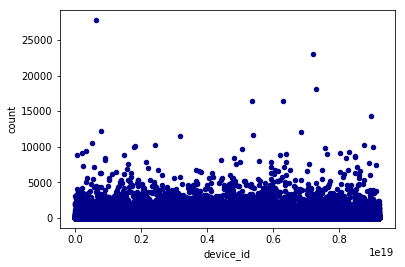

In [34]:
auc_do = auc_d.sort_values(by='count',ascending=False)
print("Prom. de apariciones de device en todos los dias: ", str(auc_do['count'].mean()))
print("Max. de apariciones de device en todos los dias: ", str(auc_do['count'].max()))
print("Min. de apariciones de device en todos los dias: ", str(auc_do['count'].min()))
auc_do.plot.scatter(x='device_id',y='count',c='DarkBlue')

#En el gráfico podemos ver que existen varios valores para los cuales la cantidad de apariciones
#no se corresponde con la media de apariciones que es cercana al 95


In [5]:
#Para cada device analizamos las apariciones según el día
#Transformo date objecto -> date
auc.head()
auc['date'] = pd.to_datetime(auc['date'],format='%Y-%m-%d')
auc.dtypes
auc.head()
auc_group_dd = auc.groupby(['date','device_id'],as_index=False).count()

In [6]:
auc_group_dd = auc_group_dd[['date','device_id','count']]
auc_group_dd = auc_group_dd.sort_values(by=['date','count'],ascending=False)

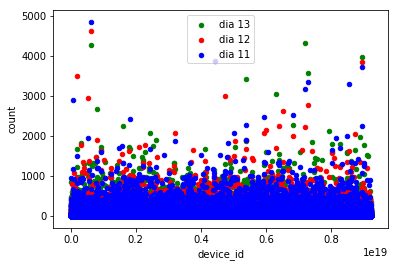

In [50]:
auc_group_dd.head()

a13 = auc_group_dd[auc_group_dd['date'] == '2019-03-13']
pa13 = a13.plot.scatter(x='device_id',y='count',c='Green',label='dia 13')
a12 = auc_group_dd[auc_group_dd['date'] == '2019-03-12']
a11 = auc_group_dd[auc_group_dd['date'] == '2019-03-11']
a10 = auc_group_dd[auc_group_dd['date'] == '2019-03-11']


pa12 = a12.plot.scatter(x='device_id',y='count',c='Red',ax=pa13,label='dia 12')
pa11 = a11.plot.scatter(x='device_id',y='count',c='Blue',ax=pa12,label='dia 11')

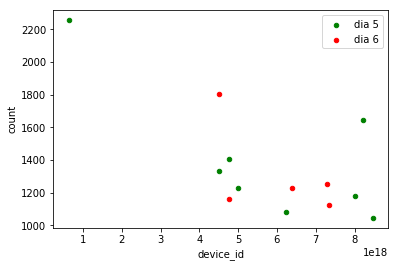

In [108]:
ma = 5000
mi = 1000
a5 = auc_group_dd[(auc_group_dd['date'] == '2019-03-05') & (auc_group_dd['count'] < ma) & (auc_group_dd['count'] > mi)]
a6 = auc_group_dd[(auc_group_dd['date'] == '2019-03-06') & (auc_group_dd['count'] < ma) & (auc_group_dd['count'] > mi)]
#a7 = auc_group_dd[auc_group_dd['date'] == '2019-03-07' & auc_group_dd['count'] < 1000 & auc_group_dd['count'] < 10]
#a8 = auc_group_dd[auc_group_dd['date'] == '2019-03-08' & auc_group_dd['count'] < 1000 & auc_group_dd['count'] < 10]

pa5 = a5.plot.scatter(x='device_id',y='count',c='Green',label='dia 5')
pa6 = a6.plot.scatter(x='device_id',y='count',c='Red',ax=pa5,label='dia 6')


In [143]:
dia = '2019-03-05'
total = auc_group_dd[(auc_group_dd['date'] == dia)].sum()['count']
print("Total subastas en día 5: "+str(total))

s0 = float(a5.sum()['count'])
print("Total subastas en día 5 entre 1000 ~ 5000: "+str(s0))


a5_2 = auc_group_dd[(auc_group_dd['date'] == dia) & (auc_group_dd['count'] < 1000) & (auc_group_dd['count'] > 500)]
s1 = float(a5_2.sum()['count'])
print("Total subastas en día 5 entre 500 ~ 1000: "+ str(s1))

a5_3 = auc_group_dd[(auc_group_dd['date'] == dia) & (auc_group_dd['count'] < 500) & (auc_group_dd['count'] > 200)]
s2 = float(a5_3.sum()['count'])
print("Total subastas en día 5 entre 200 ~ 500: "+ str(s2))

a5_4 = auc_group_dd[(auc_group_dd['date'] == dia) & (auc_group_dd['count'] < 200) & (auc_group_dd['count'] > 0)]
s3 = float(a5_4.sum()['count'])
print("Total subastas en día 5 entre 0 ~ 200: "+ str(s3))

print("Porcentajes(%): "+str(s0/total)+" "+str(s1/total)+" "+str(s2/total)+" "+str(s3/total)+"")


Total subastas en día 5: 1182401
Total subastas en día 5 entre 1000 ~ 5000: 11175.0
Total subastas en día 5 entre 500 ~ 1000: 49945.0
Total subastas en día 5 entre 200 ~ 500: 155902.0
Total subastas en día 5 entre 0 ~ 200: 963379.0
Porcentajes(%): 0.00945110838032 0.0422403228685 0.131852053576 0.81476504164


## .: Para un día en particular(2019/03/05) , la gran mayoría de las subastas ocurren con pocas apariciones, entre 0 ~ 200. El 95 % de las apariciones tiene una repetición entre 0 ~ 500

In [144]:
# Tomamos 3 días y vemos sus relaciones de apariciones
dia = '2019-03-08'
total = auc_group_dd[(auc_group_dd['date'] == dia)].sum()['count']

s0 = float(a5.sum()['count'])

a5_2 = auc_group_dd[(auc_group_dd['date'] == dia) & (auc_group_dd['count'] < 1000) & (auc_group_dd['count'] > 500)]
s1 = float(a5_2.sum()['count'])

a5_3 = auc_group_dd[(auc_group_dd['date'] == dia) & (auc_group_dd['count'] < 500) & (auc_group_dd['count'] > 200)]
s2 = float(a5_3.sum()['count'])

a5_4 = auc_group_dd[(auc_group_dd['date'] == dia) & (auc_group_dd['count'] < 200) & (auc_group_dd['count'] > 0)]
s3 = float(a5_4.sum()['count'])

print("Porcentajes(%): "+str(s0/total)+" "+str(s1/total)+" "+str(s2/total)+" "+str(s3/total)+"")

Porcentajes(%): 0.00485236226456 0.0797559012107 0.182438834183 0.704904728698


In [151]:
dia = '2019-03-12'
total = auc_group_dd[(auc_group_dd['date'] == dia)].sum()['count']

s0 = float(a5.sum()['count'])

a5_2 = auc_group_dd[(auc_group_dd['date'] == dia) & (auc_group_dd['count'] < 1000) & (auc_group_dd['count'] > 500)]
s1 = float(a5_2.sum()['count'])

a5_3 = auc_group_dd[(auc_group_dd['date'] == dia) & (auc_group_dd['count'] < 500) & (auc_group_dd['count'] > 200)]
s2 = float(a5_3.sum()['count'])

a5_4 = auc_group_dd[(auc_group_dd['date'] == dia) & (auc_group_dd['count'] < 200) & (auc_group_dd['count'] > 0)]
s3 = float(a5_4.sum()['count'])

print("Porcentajes(%): "+str(s0/total)+" "+str(s1/total)+" "+str(s2/total)+" "+str(s3/total)+"")
data={'date':[dia],'s1':[s1/total],'s2':[s2/total],'s3':[s3/total]}
df = pd.DataFrame(data=data)
df

Porcentajes(%): 0.00401991431377 0.099005363483 0.190821285581 0.660528218539


,date,s1,s2,s3
0,2019-03-12,0.099005,0.190821,0.660528


In [164]:
dates = ['2019-03-05','2019-03-06','2019-03-07','2019-03-08','2019-03-09','2019-03-10','2019-03-11','2019-03-12','2019-03-13']
list1 = []
list2 = []
list3 = []
for x in dates:
    total = auc_group_dd[(auc_group_dd['date'] == x)].sum()['count']

    s0 = float(a5.sum()['count'])

    a5_2 = auc_group_dd[(auc_group_dd['date'] == x) & (auc_group_dd['count'] < 1000) & (auc_group_dd['count'] > 500)]
    s1 = float(a5_2.sum()['count'])

    a5_3 = auc_group_dd[(auc_group_dd['date'] == x) & (auc_group_dd['count'] < 500) & (auc_group_dd['count'] > 200)]
    s2 = float(a5_3.sum()['count'])

    a5_4 = auc_group_dd[(auc_group_dd['date'] == x) & (auc_group_dd['count'] < 200) & (auc_group_dd['count'] > 0)]
    s3 = float(a5_4.sum()['count'])
    list1.append(s1/total)
    list2.append(s2/total)
    list3.append(s3/total)
data={'date':dates,'seccion 500~1000':list1,'seccion 200~500':list2,'seccion 0~200':list3}
df = pd.DataFrame(data=data)
df

,date,seccion 0~200,seccion 200~500,seccion 500~1000
0,2019-03-05,0.814765,0.131852,0.042240
1,2019-03-06,0.813401,0.134855,0.044032
2,2019-03-07,0.718006,0.172943,0.075780
3,2019-03-08,0.704905,0.182439,0.079756
4,2019-03-09,0.732007,0.171644,0.061853
5,2019-03-10,0.667648,0.191734,0.085741
6,2019-03-11,0.650002,0.195496,0.098776
7,2019-03-12,0.660528,0.190821,0.099005
8,2019-03-13,0.652453,0.194429,0.097980


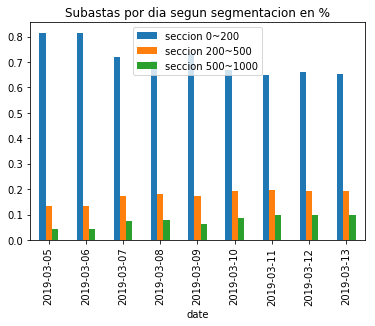

In [165]:
df.plot(kind='bar',x='date',title='Subastas por dia segun segmentacion en %')

## .: Para todos los días la incidencia de las apariciones en las subastas es mayor al 65%.
##    Para los primeros días 5/6 se puede ver una incidencia mayor en las apariciones entre 0~200, mientras que una semana despues 12/13, la incidencia disminuye, aumentando su peso sobre el total las secciones siguientes

In [ ]:
pa5 = df.plot.scatter(x='device_id',y='count',c='Green',label='dia 5')
pa6 = a6.plot.scatter(x='device_id',y='count',c='Red',ax=pa5,label='dia 6')

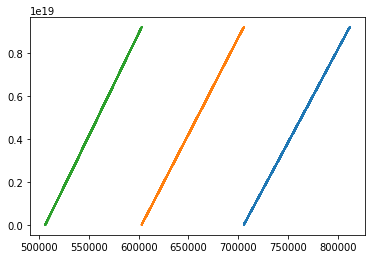

In [23]:
plt.plot(a13['device_id'])
a12 = auc_group_dd[auc_group_dd['date'] == '2019-03-12']
a11 = auc_group_dd[auc_group_dd['date'] == '2019-03-11']
plt.plot(a12['device_id'])
plt.plot(a11['device_id'])

In [180]:
# Vamos a analizar por día la cantidad de apariciones.
#auc.head(10)
#auc.loc[auc['date'] == '2019-03-11'].head(10)
#auc['date'].head(10)
#auc_do.head(10)
#auc[trim(auc['date'] == '2019-03-11']
#auc.head()
#auc.loc['2019-03-08':'2019-03-12']
#d = datetime.date(year=2019,month=3,day=8)
#d2 = datetime.date(year=2019,month=3,day=11)
#auc.loc[d:d2]


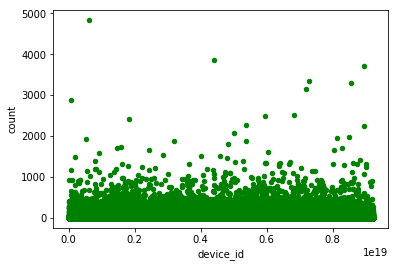

In [186]:
#Transformo a date los date object
auc['date'] = pd.to_datetime(auc['date'],format='%Y-%m-%d')
auc_dia = auc.loc[auc['date'] == '2019-03-11'][['device_id','date','count']]
auc_dia = auc_dia.groupby('device_id',as_index=False).count()
auc_dia = auc_dia.sort_values(by='count',ascending=False)
auc_dia.plot.scatter(x='device_id',y='count',c='Green')

In [187]:
auc_dia5 = auc.loc[auc['date'] == '2019-03-05'][['device_id','date','count']]
auc_dia6 = auc.loc[auc['date'] == '2019-03-06'][['device_id','date','count']]
auc_dia7 = auc.loc[auc['date'] == '2019-03-07'][['device_id','date','count']]
auc_dia8 = auc.loc[auc['date'] == '2019-03-08'][['device_id','date','count']]
auc_dia9 = auc.loc[auc['date'] == '2019-03-09'][['device_id','date','count']]
auc_dia10 = auc.loc[auc['date'] == '2019-03-10'][['device_id','date','count']]
auc_dia11 = auc.loc[auc['date'] == '2019-03-11'][['device_id','date','count']]
auc_dia12 = auc.loc[auc['date'] == '2019-03-12'][['device_id','date','count']]
auc_dia13 = auc.loc[auc['date'] == '2019-03-13'][['device_id','date','count']]


In [24]:
auc_total = auc_dia5.merge(auc_dia6,left_on='device_id',right_on='device_id')#>>> df1.merge(df2, left_on='lkey', right_on='rkey')

auc_total.plot.scatter()

#auc_total.plot.scatter(x='device_id',y='count')

NameError: name 'auc_dia5' is not defined

In [ ]:
#auc_total.plot.scatter(x='device_id',y='count_x')

## Clicks


advertiser_id: id de anunciante, cliente de Jampp que paga por el anuncio.<br>
action_id: id de acción.<br>
source_id: ID interna para la fuente (intercambio) desde la cual se originó el click.<br>
created: tiempo en el cual se produjo el click.<br>
latitude,longitude: ubicación de donde se produjo el click.<br>
carrier_id: Id para el operador de telefonía móvil del dispositivo.<br>
trans_id: Id de transacción(valor interno).<br>
os_minor: mínima version del OS.<br>
os_major: máxima versión del OS.<br>
agent_device : Agente para el dispositivo en el que se realizó el clic (modelo).<br>
specs_brand: especificaciones del dispositvo<br>
brand: marca del dispositivo<br>
timeToClick: tiempo de click<br>
touchX: posición en x del click<br>
touchY: posición en y del click<br>
ref_type: id de publicidad de Google ó apple_ifa ???<br>
ref_hash: id del ref_type

In [14]:
clicks = pd.read_csv('../data2/clicks.csv.gzip',compression='gzip', dtype='object')

In [16]:
# Vemos un poco que campos conforman el df clicks
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218923733431926,1.0712090638488148,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.97565607170903e+18,NaN,3.072849339937028e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,28.11,0.054,0.423,1891515180541284343,4368617728156436525


In [56]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null object
action_id          0 non-null object
source_id          26351 non-null object
created            26351 non-null object
country_code       26351 non-null object
latitude           26351 non-null object
longitude          26351 non-null object
wifi_connection    26351 non-null bool
carrier_id         26340 non-null object
trans_id           26351 non-null object
os_minor           26339 non-null object
agent_device       3243 non-null object
os_major           26339 non-null object
specs_brand        26351 non-null object
brand              6235 non-null object
timeToClick        22977 non-null object
touchX             23011 non-null object
touchY             23011 non-null object
ref_type           26351 non-null object
ref_hash           26351 non-null object
dtypes: bool(1), object(19)
memory usage: 3.8+ MB


### Todos los valores son strings

In [17]:
clicks.describe()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,26351,0.0,26351,26351,26351,26351,26351,26351,26340,26351,26339,3243,26339,26351,6235,22977,23011,23011,26351,26351
unique,7,0.0,11,26347,1,78,81,1,55,26351,28,190,12,5,13,17294,1001,3914,4,17119
top,3,NaN,0,2019-03-07T23:24:46.085Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,4.0,TNjkRJ46OCJKJIl62JxAYHdj4jHw8to,3.3786399484966047e+18,3.5168117921816156e+18,3.072849339937028e+18,392184377613098015,2.0,0.261,0.996,0.000,1891515180541284343,4063522808706112974
freq,26263,NaN,17009,2,26351,22949,22949,26351,4569,1,6922,656,7430,16172,2027,11,204,193,25549,41


## Cuántos anunciantes existen?

In [80]:
print("Anunciantes: "+str(clicks['advertiser_id'].describe()[0]))

Anunciantes: 26351


In [77]:
#wifi_connection vemos si existen valores null
clicks['wifi_connection'].notnull().count() == clicks['wifi_connection'].count()
# no existen valores nulos en la tabla

clicks[clicks['wifi_connection'] == False].count()
#clicks['wifi_connection'] == True

# Todas las conexiones son por wifi

advertiser_id      0
action_id          0
source_id          0
created            0
country_code       0
latitude           0
longitude          0
wifi_connection    0
carrier_id         0
trans_id           0
os_minor           0
agent_device       0
os_major           0
specs_brand        0
brand              0
timeToClick        0
touchX             0
touchY             0
ref_type           0
ref_hash           0
dtype: int64

### :. Todas las conexiones son por wifi

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.2056887519199482,1.0702342714774236,True,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218923733431926,1.0712090638488148,True,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.2056887519199482,1.0702342714774236,True,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.97565607170903e+18,NaN,3.072849339937028e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.2056887519199482,1.0702342714774236,True,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.2056887519199482,1.0702342714774236,True,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,28.11,0.054,0.423,1891515180541284343,4368617728156436525


In [94]:
#agent_device
print("agent_device count:"+str(clicks['agent_device'].count()))
print("agent_device null count: "+str(clicks[clicks['agent_device'].isnull()].count()))

#agent_device tiene muchos valores en null

agent_device count:3243
agent_device null count: advertiser_id      23108
action_id              0
source_id          23108
created            23108
country_code       23108
latitude           23108
longitude          23108
wifi_connection    23108
carrier_id         23097
trans_id           23108
os_minor           23097
agent_device           0
os_major           23097
specs_brand        23108
brand               5633
timeToClick        20369
touchX             20369
touchY             20369
ref_type           23108
ref_hash           23108
dtype: int64


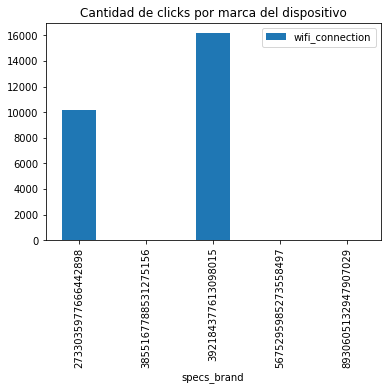

In [142]:
# brand y spec_brand
clicks[clicks['brand'].isnull()].count()
# brand tiene muchos valores nulos
specs_count = clicks.groupby(['specs_brand']).sum()
specs_count.rename(index=str,columns={"wifi_connection": "cantidad brand"})

specs_count.plot.bar(title="Cantidad de clicks por marca del dispositivo")
# Cuáles son los dispositivos por clicks más usados
#auctions['date'].dt.day.value_counts().sort_values().plot.bar(title="Subastas por dia")

In [128]:
print("cantidad de ref_type: "+str(clicks['ref_type'].count()))

print("cantidad de ref_type NULL: "+str(clicks[clicks['ref_type'].isnull()].count()['ref_type']))

cantidad de ref_type: 26351
cantidad de ref_type NULL: 0


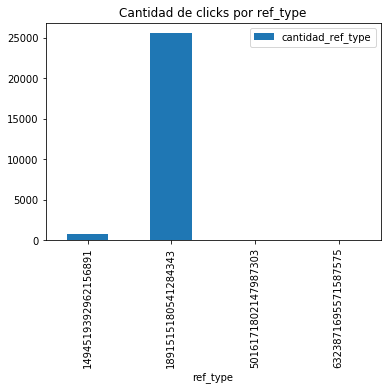

In [155]:
#tipos de ref_type
#clicks.groupby(['ref_type']).sum()#.columns('test').plot.bar(title='ref_type suma')
#clicks.groupby(['ref_type']).sum()#.columns('test').plot.bar(title='ref_type suma')
clicks.rename(index=str, columns={"wifi_connection": "cantidad_ref_type"}).groupby(['ref_type'])\
.sum().plot.bar(title="Cantidad de clicks por ref_type")

#Ref_type más usados sacando el más usado
#clicks.rename(index=str, columns={"wifi_connection": "cantidad_ref_type"}).groupby(['ref_type'])\
#.sum().sort_values(by='cantidad_ref_type',ascending=False)

# Events

In [156]:
# Qué tipo de eventos existen ?
events = pd.read_csv('../data2/events.csv.gzip',compression='gzip', dtype='object')

date: fecha de cuando el evento sucede<br>
event_id: id de evento<br>
ref_type: id de publicidad de Google ó apple_ifa ???<br>
ref_hash: ...<br>
<b>application_id:</b> es el id de la aplicación donde pasó el evento <br>
<b>attributed:</b> event de interés(1ra vez o nuevamente) atribuido a Jamp<br>
device_countrycode: codigo de país relacionado al dispo<br>
device_os_version: os version usada por el dispo<br>
device_brand: marca del dispo<br>
device_model: modelo del dispo<br>
device_city: ciudad donde el evento sucedió(inferido y estimado)<br>
session_user_agent: user agent usado donde el evento se produjo<br>
trans_id: id de transacción
user_agent: user agent relacionado con el dispo<br>
event_uuid: uuid4 generado por el evento<br>
kind: ???<br>
device_os: os usado por el dispo<br>
wifi: igual a wifi_connection<br>
connection_type: ???<br>
ip_address: ...<br>
device_language: lenguaje relacionado con el dispo<br>

In [157]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.2481569642543155e+17,9.977660181316936e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.2481569642543155e+17,8.561152834701074e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062198952597e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.2481569642543155e+17,8.731901657619553e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18


In [ ]:
# device_countrycode

## Installs

<b>created:</b> fecha de creación del evento(install)<br>
<b>application_id:</b> es el id de la aplicación donde pasó el evento <br>
<b>ref_type:</b> id de publicidad de Google ó apple_ifa ???<br>
<b>ref_hash:</b> ...<br>
<b>click_hash: hash de la instalación</b>
<b>attributed:</b> cuando una instalación es atribuida a Jampp<br>
<b>implicit:</b> cuando una instalación se realizo por un medio distinto a Jampp(u otra plataforma). No a través de la publicidad. Es data orgánica(de las app de los clientes Jampp)<br>
<b>device_countrycode:</b> código de país del dispositivo<br>
<b>device_brand:</b> marca del dispo<br> 
<b>device_model:</b> modelo del dispo<br>
<b>session_user_agent:</b> user agent usado donde el evento se produjo<br>
<b>user_agent:</b> user agent relacionado con el dispo<br>
<b>event_uuid:</b> uuid4 generado por el evento<br>
<b>kind:</b> ???<br>
<b>wifi:</b> igual a wifi_connection<br>
<b>trans_id:</b> id de transacción<br>
<b>ip_address:</b> dirección ip desde donde la instalación fue realizada<br>
<b>device_language:</b> lenguaje relacionado con el dispo<br>

In [159]:
installs = pd.read_csv('../data2/installs.csv.gzip',compression='gzip', dtype='object')

In [160]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083058605577787e+17,4.4452523127597215e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.3013777759776993e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.1379920467642125e+17,6.026543327929208e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083368711068078e+18,7.876611839898798e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.3013777759776993e+18


## Target competencia